In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#2
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#3
df.dropna(inplace=True)

In [16]:
#4
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,183,183,183,183,183
unique,183,2,127,133,3
top,"Endres, Miss. Caroline Louise",male,113760,B96 B98,S
freq,1,95,4,4,116


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000  


<AxesSubplot:>

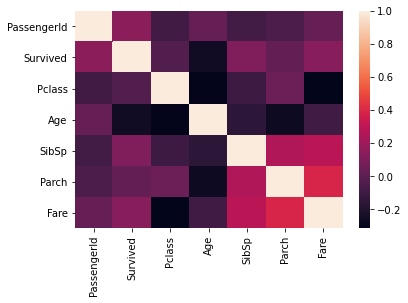

In [26]:
#5
print(df.corr())
sns.heatmap(data=df.corr())

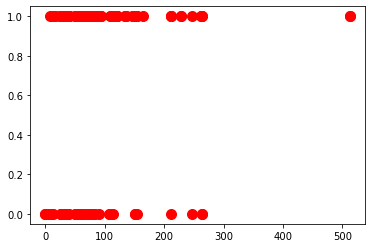

In [32]:
#6
plt.scatter(df['Fare'],df['Survived'],s=100,color='red')
plt.show()

Sex       female  male
Survived              
0              6    54
1             82    41


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

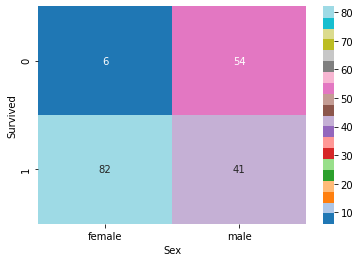

In [41]:
#7
c=pd.crosstab(df['Survived'],df['Sex'])
print(c)
sns.heatmap(data=c,annot=True,cmap='tab20')

<AxesSubplot:>

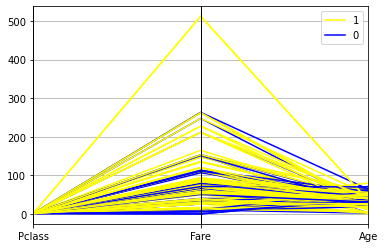

In [47]:
#8
pd.plotting.parallel_coordinates(df,'Survived',cols=['Pclass','Fare','Age'],
                                 color=['yellow','blue'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

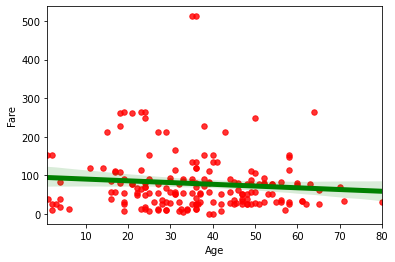

In [58]:
#9
sns.regplot(x=df.Age,y=df.Fare,scatter_kws={'color':'red','s':30,'alpha':0.8},
            line_kws={'color':'green','lw':5,'ls':'-','alpha':1})

array([[<AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

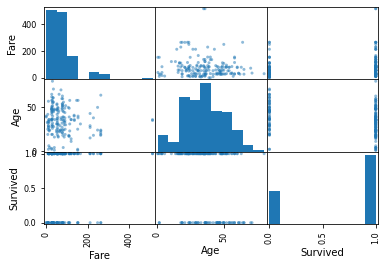

In [63]:
#10
pd.plotting.scatter_matrix(df[['Fare','Age','Survived']])

In [72]:
#11
pd.crosstab(df.Sex,df.Survived,margins=True,normalize=True)

Survived,0,1,All
Sex,,,
female,0.032787,0.448087,0.480874
male,0.295082,0.224044,0.519126
All,0.327869,0.672131,1.000000
